In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
sms = pd.read_csv("spam.csv",encoding='latin-1')
sms.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [3]:
sms.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)

In [4]:
sms.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
sms["v2"][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [6]:
first_row = re.sub("[^a-zA-Z]"," ",sms["v2"][0]).lower()

In [7]:
from nltk.corpus import stopwords

text = ["".join(word) for word in first_row.split() if word not in set(stopwords.words("english"))]



In [9]:
print(text,end=" ")

['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat'] 

In [12]:
sms["length"] = sms.v2.apply(len)
sms.head()

,v1,v2,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [13]:
sms.columns = ["label","message","length"]
sms.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [14]:
text_feat = sms['message'].copy()

In [17]:
import string
def text_process(text):
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    
    return " ".join(text)

In [18]:
text_feat = text_feat.apply(text_process)

In [20]:
text_feat[0]

'Go jurong point crazy Available bugis n great world la e buffet Cine got amore wat'

In [21]:
sms.message[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import SnowballStemmer

In [23]:
vectorizer = TfidfVectorizer("english")

In [24]:
features = vectorizer.fit_transform(text_feat)

In [26]:
features.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
def stemmer (text):
    text = text.split()
    words = ""
    for i in text:
            stemmer = SnowballStemmer("english")
            words += (stemmer.stem(i))+" "
    return words

In [28]:
text_feat = text_feat.apply(stemmer)

In [30]:
text_feat[0]

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat '

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

In [32]:
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)
abc = AdaBoostClassifier(n_estimators=62, random_state=111)
bc = BaggingClassifier(n_estimators=9, random_state=111)
etc = ExtraTreesClassifier(n_estimators=9, random_state=111)

In [34]:
clfs = {'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc, 'AdaBoost': abc, 'BgC': bc, 'ETC': etc}

In [35]:
def train_classifier(clf,x_train,y_train):
    clf.fit(x_train,y_train)

In [36]:
def predict_class(clf,x_test):
    return clf.predict(x_test)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features, sms['label'], test_size=0.3, random_state=111)

In [49]:
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, X_train, Y_train)
    pred = predict_class(v,X_test)
    pred_scores.append((k, [accuracy_score(Y_test,pred)]))

In [44]:
pred_scores

[('KN', 0.9246411483253588),
 ('NB', 0.9844497607655502),
 ('DT', 0.958732057416268),
 ('LR', 0.9431818181818182),
 ('RF', 0.9700956937799043),
 ('AdaBoost', 0.9671052631578947),
 ('BgC', 0.9671052631578947),
 ('ETC', 0.9772727272727273)]

In [50]:
import warnings
warnings.filterwarnings("ignore")
df = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score'])
df

,Score
KN,0.924641
NB,0.984450
DT,0.958732
LR,0.943182
RF,0.970096
AdaBoost,0.967105
BgC,0.967105
ETC,0.977273


In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

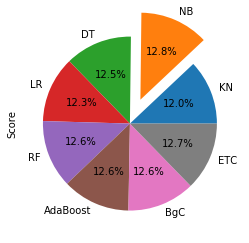

In [62]:
#only explode the 2nd classifir
exp = (0, 0.3, 0, 0, 0, 0, 0, 0)
df.plot(kind="pie",subplots=True,autopct="%1.1f%%",legend=False, explode=exp)
plt.show()